# Laboratorio: Classificazione (parte 2)

**Programmazione di Applicazioni Data Intensive**  
Laurea in Ingegneria e Scienze Informatiche  
DISI - Universit√† di Bologna, Cesena

Proff. Gianluca Moro, Roberto Pasolini  
nome.cognome@unibo.it

In [1]:
# setup e test librerie
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import scipy

## Riepilogo: Classificazione con iperpiani

- In un problema di _classificazione_ dobbiamo suddividere correttamente delle osservazioni in _classi_ predefinite
  - a differenza della regressione in cui dobbiamo predire un valore in un dominio continuo
- I casi pi√π comuni prevedono la classificazione _binaria_, ovvero con due possibili classi
- I modelli lineari funzionano tramite l'individuazione di un _iperpiano_ nello spazio delle variabili che separi quanto meglio possibile le osservazioni tra le due classi

- Riprendiamo il [set di dati sulle cellule tumorali](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) utilizzato nella prima parte

In [2]:
BCWDS_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
bcwds = pd.read_csv(BCWDS_URL, header=None, index_col=0)

- Assegniamo i nomi alle colonne come fatto l'altra volta

In [3]:
cell_features = ["radius",     "texture",
                 "perimeter",  "area",
                 "smoothness", "compactness",
                 "concavity",  "concave_pts",
                 "symmetry",   "fractal_dim"]
stats = ["mean", "std", "worst"]
bcwds.columns = ["diagnosis"] + [s + "_" + f for s in stats for f in cell_features]

In [4]:
bcwds.head(5)

diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0                                                                          
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          mean_smoothness  mean_compactness  mean_concavity  mean_concave_pts  \
0                                                                               
842302            0.11840           0.27760          0.3001           0.14710   
842517            0.08474           0.07864          0.0869           0.07017   
84300903          0.10960           0.15990          0.1974           0.12790   
84348301          0.14250           0.28390          0.2414           0.10520   
84358402          0.10030           0.13280          0.1980           0.10430   

          mean_symmetry  ...  worst_radius  worst_texture  worst_perimeter  \
0                        ...                                                 
842302           0.2419  ...         25.38          17.33           184.60   
842517           0.1812  ...         24.99          23.41           158.80   
84300903         0.2069  ...         23.57          25.53           152.50   
84348301         0.2597  ...         14.91          26.50            98.87   
84358402         0.1809  ...         22.54          16.67           152.20   

          worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0                                                                            
842302        2019.0            0.1622             0.6656           0.7119   
842517        1956.0            0.1238             0.1866           0.2416   
84300903      1709.0            0.1444             0.4245           0.4504   
84348301       567.7            0.2098             0.8663           0.6869   
84358402      1575.0            0.1374             0.2050           0.4000   

          worst_concave_pts  worst_symmetry  worst_fractal_dim  
0                                                               
842302               0.2654          0.4601            0.11890  
842517               0.1860          0.2750            0.08902  
84300903             0.2430          0.3613            0.08758  
84348301             0.2575          0.6638            0.17300  
84358402             0.1625          0.2364            0.07678  

[5 rows x 31 columns]

- Impostiamo come variabile da predire la classe `diagnosis` ("B" o "M") e come variabili predittive tutte le altre 30

In [5]:
y = bcwds["diagnosis"]
X = bcwds.drop(columns="diagnosis")

- Suddividiamo i dati in training e validation set con proporzione 66-33

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=1/3, random_state=42)

## Esercizio 1: Addestramento e validazione modelli

- Definiamo un modello di regressione logistica configurandone l'implementazione e il seed per la casualit√†
  - gli altri parametri sono lasciati ai valori di default, ad es. la regolarizzazione applicata √® L2 con C=1

In [7]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(solver="saga", random_state=42)

- **(1a)** Addestrare il modello sul training set e calcolarne l'accuratezza sul validation set
- **(1b)** Ripetere gli stessi passaggi su un modello `model2` con la stessa configurazione di `model1`, ma applicando la standardizzazione alle variabili

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [9]:
##solhead:ESERCIZIO 1

In [10]:
##sol:1a
model1.fit(X_train, y_train)
model1.score(X_val, y_val)

/home/rrobby/.venvs/dia2020/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.9578947368421052

In [11]:
##sol:1b
model2 = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(penalty="l1", solver="saga", random_state=42))
])
model2.fit(X_train, y_train)
model2.score(X_val, y_val)

/home/rrobby/.venvs/dia2020/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.9842105263157894

## Intervallo di confidenza dell'accuratezza

- L'accuratezza ci da un'indicazione di quanto il modello sia efficace nel prevedere le classi corrette delle osservazioni
- Tale valore √® comunque una stima che dipende anche dal validation set usato
  - un test su molte osservazioni √® in generale pi√π significativo di uno su poche
- Fissiamo un _livello di confidenza_, ovvero una percentuale di certezza che vogliamo avere: tipicamente si pone il 95\%
- Vogliamo individuare l'_intervallo di confidenza_, cio√® l'intervallo di valori in cui l'accuratezza "reale" del modello si trova col 95\% di probabilit√†

- Gli estremi dell'intervallo di confidenza si possono individuare con la formula
$$ \frac{2Na+Z^2\pm Z\sqrt{Z^2+4Na+4Na^2}}{2(N+Z^2)} $$
  - $a$ √® l'accuratezza del modello misurata sul validation set
  - N √® il numero di osservazioni nel validation set
  - Z √® il valore tale per cui l'area sottesa dalla densit√† di probabilit√† $\varphi(x)$ della distribuzione normale standard tra -Z e Z sia il livello di confidenza 1-ùõº
  - possiamo ricavare dalle apposite tabelle di valori che, per 1-ùõº = 0.95 (ùõº=0.05), Z = 1.96
- Definiamo una funzione Python che calcoli tale formula e restituisca una tupla con i due estremi (poniamo Z=1.96 come default)

In [12]:
def conf_interval(a, N, Z=1.96):
    c = (2 * N * a + Z**2) / (2 * (N + Z**2))
    d = Z * np.sqrt(Z**2 + 4*N*a - 4*N*a**2) / (2 * (N + Z**2))
    return c - d, c + d

- Come ricavare il valore di Z per altri livelli di confidenza via codice, senza consultare la tabella?
- Importiamo da SciPy l'oggetto `norm` che rappresenta la distribuzione normale standard
  - SciPy √® una libreria con diverse funzionalit√† utili, spesso usata insieme a NumPy e scikit-learn

In [13]:
from scipy.stats import norm

- Dalla funzione di probabilit√† cumulata `cdf` possiamo verificare che a Z = 1.96 corrisponde 1-ùõº/2 = 0.975, quindi 1-ùõº = 0.95

In [14]:
norm.cdf(1.96)

0.9750021048517795

- Per individuare questo valore anche per altri livelli di confidenza, possiamo usare la funzione `ppf`, inversa di `cdf`

In [15]:
norm.ppf(0.975)   # 1 - 0.05/2

1.959963984540054

## Esercizio 2: Intervallo di confidenza su modelli scikit-learn

- **(2a)** Implementare la funzione `model_conf_interval` in modo che
  - prenda in input un modello addestrato `model`, un validation set `X, y` e un livello di confidenza `level` (default 0.95)
  - restituisca l'intervallo di confidenza dell'accuratezza del modello, servendosi della funzione `conf_interval` sopra
- **(2b)** Usare la funzione per calcolare l'intervallo di confidenza al 95\% (default) dell'accuratezza di `model1` stimata sul validation set
- **(2c)** Ripetere 1b con livello di confidenza del 99\%

In [16]:
##solhead:ESERCIZIO 2

In [17]:
##nosol
def model_conf_interval(model, X, y, level=0.95):
    ...

In [18]:
##sol:2a
def model_conf_interval(model, X, y, level=0.95):
    a = model.score(X, y)
    N = len(X)
    Z = norm.ppf((1 + level) / 2)
    return conf_interval(a, N, Z)

In [19]:
##sol:2b
model_conf_interval(model1, X_val, y_val)

(0.919128098881562, 0.9785126899290106)

In [20]:
##sol:2c
model_conf_interval(model1, X_val, y_val, 0.99)

(0.9024491168701911, 0.9824395931589949)

## Confronto tra modelli

- Dati due modelli diversi, vogliamo poter valutare se l'accuratezza $a_1$ misurata su uno sia significativamente migliore della $a_2$ misurata sull'altro
- Se i numeri di osservazioni $N_1$ e $N_2$ nei validation set utilizzati √® abbastanza grande (pi√π di 30), l'accuratezza √® approssimabile con una distribuzione normale
  - spesso il validation set √® lo stesso, per cui $N_1=N_2$
- La varianza della differenza di accuratezza si stima con
$$ \hat{\sigma}^2 = \frac{a_1(1-a_1)}{N_1}+\frac{a_2(1-a_2)}{N_2} $$
- Gli estremi dell'intervallo di confidenza della differenza sono dati da
$$ |a_1-a_2|\pm Z\hat{\sigma} $$
- Se l'intervallo ottenuto non include lo zero (l'estremo inferiore √® positivo), abbiamo la certezza al 95\% (o altro livello di confidenza) che il modello con accuratezza stimata maggiore sia effettivamente migliore

## Esercizio 3: Confronto tra modelli

- **(3a)** Implementare la funzione `diff_interval` in modo che
  - prenda in input le accuratezze `a1` e `a2`, i numeri di osservazioni `N1` e `N2` e il coefficiente `Z`
  - calcoli l'intervallo di confidenza della differenza tra due modelli secondo la formula sopra
- **(3b)** Implementare la funzione `model_diff_interval` in modo che
  - prenda in input due modelli `m1, m2`, un validation set `X, y` e un livello di confidenza `level` (default 0.95)
  - restituisca l'intervallo di confidenza della differenza di accuratezza tra i due modelli, valutati entrambi sul validation set dato
- **(3c)** Usare la funzione per calcolare l'intervallo al 95\% della differenza di accuratezza sul validation set tra `model1` e `model2` definiti sopra
  - Abbiamo la certezza al 95\% che `model2` sia migliore?

In [21]:
##solhead:ESERCIZIO 3

In [22]:
##nosol
def diff_interval(a1, a2, N1, N2, Z):
    ...

In [23]:
##sol:3a
def diff_interval(a1, a2, N1, N2, Z):
    d = abs(a1 - a2)
    sd = np.sqrt(a1 * (1-a1) / N1 + a2 * (1-a2) / N2)
    return d - Z * sd, d + Z * sd

In [24]:
##sol:3b
def model_diff_interval(m1, m2, X, y, level=0.95):
    a1 = m1.score(X, y)
    a2 = m2.score(X, y)
    N = len(X)
    Z = norm.ppf((1 + level) / 2)
    return diff_interval(a1, a2, N, N, Z)

In [25]:
##sol:3c
model_diff_interval(model1, model2, X_val, y_val)
# l'intervallo include lo 0 -> model2 non √® significativamente migliore

(-0.007294375075243366, 0.05992595402261173)

## Classificazione a pi√π classi

- I modelli di classificazione basati su un iperpiano presuppongono che i dati siano suddivisi in esattamente due classi
- Come costruire un modello che classifichi dei dati in pi√π di due classi?
- Si possono combinare **molteplici modelli** basati su iperpiano, ciascuno riferito ad una specifica classe

- Per visualizzare il funzionamento di un modello multiclasse, serviamoci del classico dataset d'esempio "Iris"
  - ogni osservazione corrisponde ad un fiore
  - le variabili predittive sono la lunghezza e larghezza di petali e sepali
  - la classe da prevedere √® la specie del fiore, tra 3 possibili
- Questo dataset √® incluso nel modulo `datasets` di scikit-learn

In [26]:
from sklearn.datasets import load_iris
iris_data = load_iris()

- Otteniamo un frame `iris_X` con le variabili predittive...

In [27]:
iris_X = pd.DataFrame(iris_data["data"], columns=iris_data["feature_names"])
iris_X.head(3)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2

- ...e una serie `iris_y` con le corrispondenti classi (specie dei fiori), di cui vediamo la distribuzione

In [28]:
iris_y = pd.Series(iris_data["target_names"][iris_data["target"]])
iris_y.value_counts()

virginica     50
versicolor    50
setosa        50
dtype: int64

- Consideriamo le prime due variabili, _sepal length_ e _sepal width_

In [29]:
iris_Xsep = iris_X.iloc[:, [0, 1]]

- Definiamo un dizionario con i colori da associare alle classi

In [30]:
iris_color_map = {"setosa": "blue", "versicolor": "green", "virginica": "red"}

- Visualizziamo uno scatter plot delle due variabili, con punti colorati in base alla classe

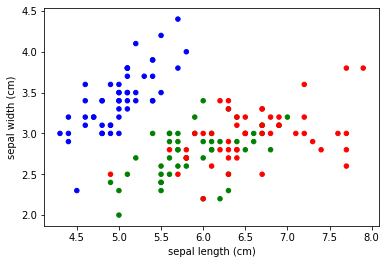

In [31]:
iris_Xsep.plot.scatter(iris_Xsep.columns[0], iris_Xsep.columns[1],
                       c=iris_y.map(iris_color_map));

- Per addestrare un modello di regressione logistica, creiamo normalmente un oggetto `LogisticRegression`
- Tale oggetto incapsuler√† **un iperpiano per distinguere ciascuna classe**
- Tali iperpiani possono essere estratti in due modi
  - con `multi_class="ovr"` (_one versus rest_) per ciascuna classe C si addestra un modello indipendentemente dagli altri a distinguere "C" da "non C"
  - con `multi_class="multinomial"` (default) viene calcolata e minimizzata un'unica funzione d'errore (con eventuale regolarizzazione) su tutti gli iperpiani
- Usiamo ad esempio in modo esplicito la modalit√† default "ovr"

In [32]:
model = LogisticRegression(C=10, multi_class="ovr",
                           solver="saga",random_state=42)

- Addestriamo il modello come al solito col metodo `fit`
  - avendo poche osservazioni ed essendo solo un esempio illustrativo, non suddividiamo i dati in training e validation set

In [33]:
model.fit(iris_Xsep, iris_y);

/home/rrobby/.venvs/dia2020/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


- Negli attributi `coef_` e `intercept_` del modello troviamo questa volta i coefficienti di 3 iperpiani invece che di uno

In [34]:
model.coef_

array([[-4.1447591 ,  6.60324145],
       [ 0.44157874, -2.18028243],
       [ 1.63875599, -1.80890275]])

In [35]:
model.intercept_

array([ 1.75073607,  3.17637618, -5.09021097])

- Riprendiamo dalla scorsa esercitazione la funzione `separator_2d` per graficare un iperpiano di un modello con 2 variabili, modificata in modo che possiamo scegliere l'iperpiano da graficare (parametro `n`)

In [36]:
def separator_2d(model, x1, n=0):
    return -x1*model.coef_[n, 0]/model.coef_[n, 1] -model.intercept_[n]/model.coef_[n, 1]

- Creiamo un grafico con tutti e 3 gli iperpiani (rette nel caso a 2 variabili) sovrapposti ai dati

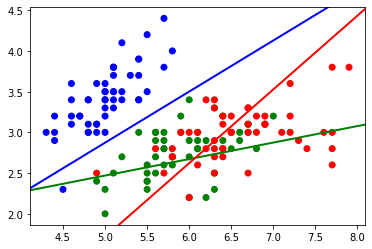

In [37]:
plt.scatter(*iris_Xsep.values.T, c=iris_y.map(iris_color_map))
xlim, ylim = plt.xlim(), plt.ylim()
for n, c in enumerate(model.classes_):
    sep_x = np.linspace(*xlim, 2)
    sep_y = separator_2d(model, sep_x, n)
    plt.plot(sep_x, sep_y, c=iris_color_map[c], linewidth=2)
plt.xlim(xlim); plt.ylim(ylim);

- In ogni punto del piano abbiamo una distribuzione di proabilit√† tra le 3 classi, influenzata dai 3 iperpiani

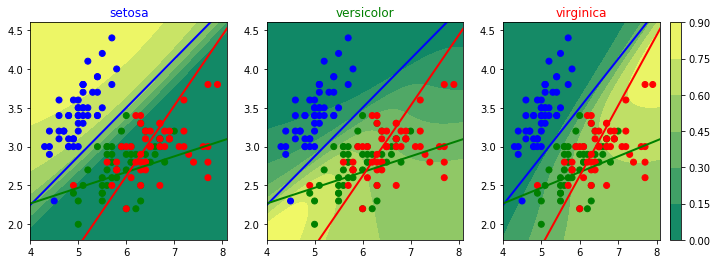

In [38]:
mx1, mx2 = np.meshgrid(np.linspace(4, 8.1, 100), np.linspace(1.8, 4.6, 100))
plt.figure(figsize=(12, 4))
for pn, pc in enumerate(model.classes_):
    ax = plt.subplot(1, 3, pn+1)
    my = model.predict_proba(np.c_[mx1.ravel(), mx2.ravel()])[:, pn].reshape(mx1.shape)
    contplot = ax.contourf(mx1, mx2, my, cmap="summer")
    ax.scatter(*iris_Xsep.values.T, c=pd.Series(iris_y).map(iris_color_map))
    xlim, ylim = ax.get_xlim(), ax.get_ylim()
    sep_x = np.linspace(*xlim, 2)
    for rn, rc in enumerate(model.classes_):
        sep_y = separator_2d(model, sep_x, rn)
        ax.plot(sep_x, sep_y, c=iris_color_map[rc], linewidth=2)
    ax.set_title(model.classes_[pn], c=iris_color_map[pc])
    ax.set_xlim(xlim); ax.set_ylim(ylim)
plt.colorbar(contplot);

- Dalla distribuzione otteniamo la classe pi√π probabile in ciascun punto
- Otteniamo in pratica 3 regioni di spazio, ciascuna costituita dall'intersezione di 2 semispazi

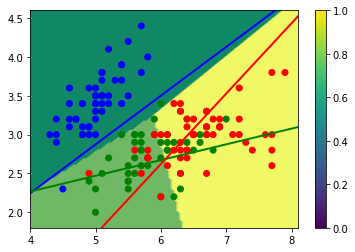

In [39]:
mx1, mx2 = np.meshgrid(np.linspace(4, 8.1, 100), np.linspace(1.8, 4.6, 100))
my = model.predict(np.c_[mx1.ravel(), mx2.ravel()])
my = np.array([list(model.classes_).index(c) for c in my])
my = my.reshape(mx1.shape)
plt.contourf(mx1, mx2, my, cmap="summer")
plt.scatter(*iris_Xsep.values.T, c=pd.Series(iris_y).map(iris_color_map))
plt.colorbar();
xlim, ylim = plt.xlim(), plt.ylim()
for n, c in enumerate(model.classes_):
    sep_x = np.linspace(*xlim, 2)
    sep_y = separator_2d(model, sep_x, n)
    plt.plot(sep_x, sep_y, c=iris_color_map[c], linewidth=2)
plt.xlim(xlim); plt.ylim(ylim);

- Valutiamo l'accuratezza del modello

In [40]:
model.score(iris_Xsep, iris_y)

0.8

- Per avere maggiori informazioni, estraiamo la matrice di confusione

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(iris_y, model.predict(iris_Xsep))
pd.DataFrame(cm, index=model.classes_, columns=model.classes_)

setosa  versicolor  virginica
setosa          49           1          0
versicolor       2          29         19
virginica        0           8         42

- Come si nota anche graficamente, la maggior parte degli errori √® tra le classi _versicolor_ (verde) e _virginica_ (rossa)

## Caso di studio: Marketing mirato

- Per aumentare il rendimento delle campagne di marketing, un'azienda deve selezionare accuratamente i clienti target di ciascuna
- Per prendere decisioni consapevoli, si possono sfruttare le informazioni sulle campagne precedenti
- Il dataset [Predicting Profitable Customer Segments](https://www.kaggle.com/tsiaras/predicting-profitable-customer-segments) da Kaggle fornisce dati ricavati da campagne pubblicitarie di un'azienda di vendite online
- Usare il comando sotto per caricare il dataset
  - il file all'URL dato √® un archivio ZIP, lo specifichiamo nella funzione `read_csv` per far s√¨ che pandas estragga il file CSV dal suo interno

In [42]:
ctds = pd.read_csv("https://git.io/JfEXh", compression="zip")

- Vediamo alcune delle colonne presenti come esempio

In [43]:
ctds.iloc[:5, [0, 1, 2, 21, 22, 23, 42, 43, 44, 70]]

g1_1  g1_2  g1_3  g2_1  g2_2  g2_3   c_1  c_2  c_3  target
0   4.50     1     3  1.83     6     0  1.97   -1    7       2
1   2.20    24    22  2.80    34    14  1.85    2    1       1
2  12.00     7     4  1.30    11    18  1.70   -5   10       2
3   1.91     8     5  4.50     5     3  1.98   -1    3       0
4   2.50    23    16  3.00    29    23  1.80   -3    2       2

- Ad ogni riga corrisponde un confronto tra due diversi gruppi di clienti su cui si √® svolta una stessa campagna di marketing
- Le colonne `g1_*` e `g2_*` indicano diverse caratteristiche dei due gruppi presi singolarmente
- Le colonne `c_*` sono invece derivate dal confronto tra i due gruppi
  - nella documentazione del dataset non sono dati i significati specifici di ciascuna colonna

- La colonna `target` indica su quale dei due gruppi la campagna ha dato maggiori profitti
  - 0 = nessuno dei due gruppi ha dato profitti degni di nota
  - 1 = il primo gruppo ha datto maggiori profitti
  - 2 = il secondo gruppo ha dato maggiori profitti

In [44]:
ctds["target"].value_counts()

1    3076
2    1877
0    1667
Name: target, dtype: int64

- L'obiettivo √® estrarre un modello di classificazione che, date le variabili estratte dalle caratteristiche dei due gruppi e dal relativo confronto, preveda se uno dei due dia pi√π profitti e quale
- Definiamo quindi come `y` la variabile `target` e come `X` tutte le altre

In [45]:
X = ctds.drop(columns="target")
y = ctds["target"]

## Esercizio 4: Classificazione a pi√π classi

- **(4a)** Suddividere casualmente i dati `X, y` in un training set col 75\% dei dati e in un test set col restante 25\%
- **(4b)** Eseguire una grid search sul training set con cross validation a 3 fold stratificati casuali per individuare il modello di regressione logistica con parametri migliori secondo le seguenti specifiche:
  - standardizzazione delle variabili
  - regolarizzazione `l2` oppure `l1`
  - costo `C` variabile tra 0.01, 0.1, 1, 10
  - modalit√† `multi_class` pari a `ovr` o `multinomial`
- **(4c)** Estrarre l'accuratezza sul test set del modello ottenuto sopra
- **(4d)** Estrarre la matrice di confusione
- **(4e)** Estrarre lo score F1 su ciascuna classe

In [46]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score

In [47]:
##solhead:ESERCIZIO 4

In [48]:
##sol:4a
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=1/4)

In [49]:
##sol:4b
skf = StratifiedKFold(3, shuffle=True)
model = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(solver="saga"))
])
grid = {
    "logreg__penalty": ["l2", "l1"],
    "logreg__C": [0.01, 0.1, 1, 10],
    "logreg__multi_class": ["ovr", "multinomial"]
}
gs = GridSearchCV(model, grid, cv=skf)
gs.fit(X_train, y_train);

/home/rrobby/.venvs/dia2020/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/rrobby/.venvs/dia2020/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/rrobby/.venvs/dia2020/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/rrobby/.venvs/dia2020/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/rrobby/.venvs/dia2020/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: Convergence

In [50]:
##sol:4c
gs.score(X_test, y_test)

0.5776435045317221

In [51]:
##sol:4d
cm = confusion_matrix(y_test, gs.predict(X_test))
pd.DataFrame(cm, index=gs.classes_, columns=gs.classes_)

0    1    2
0   8  279  142
1  10  670   88
2  15  165  278

In [52]:
##sol:4e
f1_score(y_test, gs.predict(X_test), average=None)

array([0.03463203, 0.7120085 , 0.57556936])

## Classificazione non lineare

- Abbiamo visto finora come addestrare classificatori lineari, che separano lo spazio delle variabili in regioni convesse
- Possiamo avere a che fare per√≤ con set di dati con classi non linearmente separabili, per cui tali classificatori non possono funzionare in modo soddisfacente
- Vediamo un esempio di funzionamento con un dataset sintetico generato casualmente
- La funzione `make_circles` genera punti in un piano distribuiti in due corone circolari concentriche

- Generiamo due dataset da una stessa distribuzione, uno per training e l'altro per validazione

In [53]:
from sklearn.datasets import make_circles
X_train, y_train = make_circles(1000, noise=0.1, factor=0.5, random_state=23)
X_val, y_val = make_circles(1000, noise=0.1, factor=0.5, random_state=42)

- Ciascuna istanza √® un punto sul piano, la cui classe √® 0 (cerchio esterno) o 1 (cerchio interno)

In [54]:
X_train[:5]

array([[ 0.4677266 ,  0.05443974],
       [-0.34703554, -0.30774354],
       [-0.915094  ,  0.46046701],
       [ 0.48564263,  0.22661689],
       [ 0.6280253 , -0.08921573]])

In [55]:
y_train[:5]

array([1, 1, 0, 1, 1])

- Visualizziamo i punti del training set, colorati in base alla loro classe reale

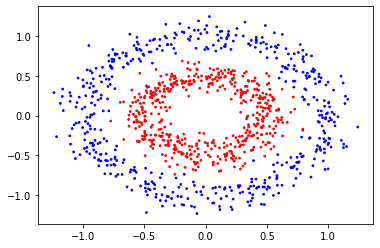

In [56]:
plt.scatter(*X_train.T, s=3, c=np.where(y_train, "red", "blue"));

- Vogliamo addestrare un classificatore a distinguere, date le coordinate di un punto, se faccia parte del cerchio esterno o di quello interno

## Esercizio 5: Modello lineare

- **(5a)** Addestrare un modello di regressione logistica sui dati di training
- **(5b)** Calcolare l'accuratezza del modello sul validation set
- **(5c)** Creare un grafico a dispersione del validation set con i punti colorati in base alla classe predetta dal modello

In [57]:
##solhead:ESERCIZIO 5

In [58]:
##sol:5a
model = LogisticRegression(solver="saga")
model.fit(X_train, y_train);

In [59]:
##sol:5b
model.score(X_val, y_val)

0.497

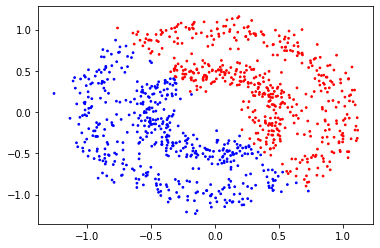

In [60]:
##sol:5c
y_pred = model.predict(X_val)
plt.scatter(*X_val.T, s=3, c=np.where(y_pred, "red", "blue"));

- Essendo un classificatore lineare, non √® in grado di separare correttamente le due classi
- Per maggiore dettaglio, creiamo una funzione per visualizzare le regioni di spazio in cui il classificatore suddivide i dati

In [61]:
def plot_class_model(X, y, model):
    plt.scatter(X[:, 0], X[:, 1])
    xlim, ylim = plt.xlim(), plt.ylim()
    mx = np.linspace(xlim[0], xlim[1], 101)
    my = np.linspace(ylim[0], ylim[1], 101)
    mx, my = np.meshgrid(mx, my)
    mz = model.predict_proba(np.c_[mx.ravel(), my.ravel()])[:, 1].reshape(mx.shape)
    plt.contourf(mx, my, mz, cmap="cool")
    plt.scatter(X[:, 0], X[:, 1], c=np.where(y, "#880000", "blue"), s=4)

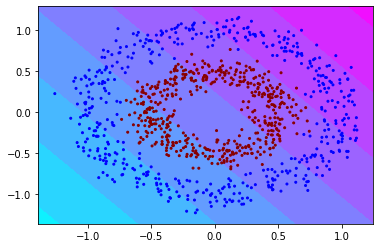

In [62]:
plot_class_model(X_val, y_val, model)

- Le sfumature sullo sfondo indicano le probabilit√† con cui il classificatore assegna un punto ad una classe o all'altra

- Conoscendo la forma del dataset, possiamo introdurre nuove variabili specifiche tali per cui le classi diventino linearmente separabili
- Introduciamo ad esempio variabili polinomiali di secondo grado

In [63]:
from sklearn.preprocessing import PolynomialFeatures
model = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lr",   LogisticRegression(solver="saga"))
])
model.fit(X_train, y_train);

In [64]:
model.score(X_val, y_val)

0.993

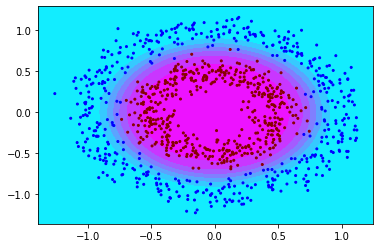

In [65]:
plot_class_model(X_val, y_val, model)

- Grazie all'uso dei quadrati delle variabili come feature, √® possibile separare linearmente le due classi

- A conferma, si vedano i coefficienti del modello di regressione: i due con valori pi√π significativi sono quelli dei quadrati (`x0^2` e `x1^2`)

In [66]:
pd.Series(
    model.named_steps["lr"].coef_[0],
    index=model.named_steps["poly"].get_feature_names()
)

x0       0.007880
x1      -0.075327
x0^2    -8.345327
x0 x1   -0.053288
x1^2    -8.368515
dtype: float64

- Si veda inoltre il grafico a dispersione dove invece delle variabili `x0` e `x1` rappresentiamo i rispettivi quadrati

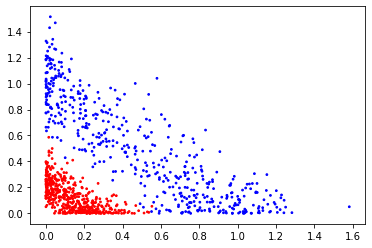

In [67]:
plt.scatter(*(X_val**2).T, s=3, c=np.where(y_val, "red", "blue"));

- Con questa rappresentazione le due classi sono linearmente separabili
- Tale rappresentazione √® per√≤ stata decisa arbitrariamente da noi
- Come ottenere un modello accurato senza generare manualmente delle feature?

## Multi-layer perceptron

- L'output di un classificatore lineare $y$ √® un iperpiano determinato dalla combinazione lineare delle variabili $x_1,\ldots,x_n$ in input, ciascuna con un peso diverso
  - qu√¨ indichiamo il bias o intercetta come "peso" $w_0$
$$ w_0+w_1\cdot x_1+\ldots+w_n\cdot x_n = 0 $$
- Poniamo di introdurre delle variabili _nascoste_ (_hidden_) $h_1,\ldots,h_m$ in modo che
  - l'iperpiano individuato dal modello sia combinazione lineare delle variabili nascoste
$$ w_0+w_1\cdot h_1+\ldots+w_m\cdot h_m = 0 $$
  - ciascuna variabile nascosta sia combinazione lineare di quelle in ingresso
$$ h_i = v_{i,0}+v_{i,1}\cdot x_1+\ldots+v_{i,n}\cdot x_n $$
- Questo tipo di modello viene definito _multi-layer perceptron_, in quanto si tratta in pratica di pi√π modelli lineari disposti a strati

- Per creare un modello di classificazione di questo tipo usiamo la classe `MLPClassifier`
  - con `hidden_layer_sizes` specifichiamo il numero di variabili nascoste da introdurre, ad esempio 4
  - con `activation="identity"` specifichiamo che tali variabili sono lineari

In [68]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=4, activation="identity")

- Eseguiamo ora l'addestramento del modello
  - viene utilizzata la discesa gradiente _stocastica_: ciascun aggiustamento dei pesi √® basato su un campione casuale di osservazioni di training
  - l'errore e la relativa derivata sono calcolati per l'output finale e a cascata per ciascuna delle variabili nascoste (_backpropagation_)

In [69]:
model.fit(X_train, y_train);

- Negli attributi `coefs_` e `intercepts_` del modello addestrato troviamo liste di array con pesi e bias suddivisi per strato
  - allo strato 0 troviamo 2√ó4 pesi e 4 bias con cui dalle 2 variabili di input sono calcolate le 4 nascoste
  - allo strato 1 troviamo 4 pesi e 1 bias con cui dalle 4 variabili intermedie √® calcolato l'output finale

In [70]:
model.coefs_

[array([[ 0.81286711,  0.12309924,  0.24420538, -0.75715   ],
        [-0.1716992 ,  0.52305944, -0.52078336,  0.28235264]]),
 array([[ 0.97308076],
        [-0.69686791],
        [-0.43044564],
        [ 0.79054113]])]

In [71]:
model.intercepts_

[array([-0.11427537,  0.95170746, -0.5441725 ,  0.32054849]),
 array([0.29804078])]

- Vediamo come prima il grafico con le probabilit√† delle classi indicate dal modello

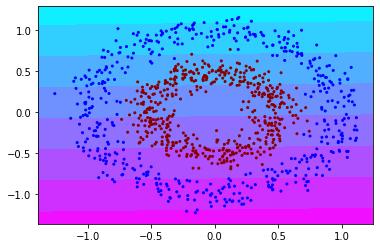

In [72]:
plot_class_model(X_val, y_val, model)

- Il grafico risulta identico a quello dei modelli lineari semplici
- Anche l'accuratezza rimane la stessa

In [73]:
model.score(X_val, y_val)

0.521

- Questo √® dovuto al fatto che, anche con pi√π strati, l'output finale **rimane una combinazione lineare dell'input**
- Possiamo aggiungere espressivit√† al modello introducendo **trasformazioni non lineari**

- La funzione _ReLU_ (_rectified linear unit_) √® un esempio di funzione che introduce non linearit√†
$$ \text{ReLU}(x) = \max(0, x) $$
- Definiamola in Python, usando la funzione `maximum` di NumPy per ottenerne una versione vettoriale (applicabile ad un array di valori)

In [74]:
def relu(x):
    return np.maximum(0, x)

- Possiamo usarla ad es. per tracciarne il grafico

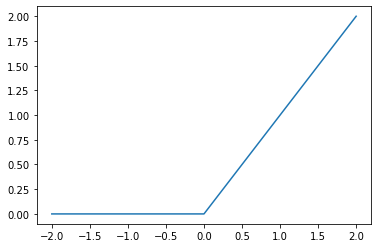

In [75]:
px = np.linspace(-2, 2, 101)
py = relu(px)
plt.plot(px, py);

- Essendo una funzione **continua e derivabile**, rimane utilizzabile nel modello addestrato con la discesa gradiente (stocastica)

- Riconfiguriamo il modello in modo tale che il valore delle variabili nascoste sia il risultato dell'applicazione di ReLU alla combinazione lineare degli input
$$ h_i = \text{ReLU}(v_{i,0}+v_{i,1}\cdot x_1+\ldots+v_{i,n}\cdot x_n) $$
- Per far ci√≤, specifichiamo `activation="relu"` (default) nella configurazione di `MLPClassifier`
- Addestriamo un modello con 2 sole variabili nascoste per poter visualizzarle in seguito

In [76]:
model = MLPClassifier(hidden_layer_sizes=2, activation="relu", random_state=23757)

- Addestriamo il modello sui dati di training e valutiamo l'accuratezza su quelli di validation

In [77]:
model.fit(X_train, y_train);

/home/rrobby/.venvs/dia2020/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [78]:
model.score(X_val, y_val)

0.698

- Vediamo che l'accuratezza √® migliorata

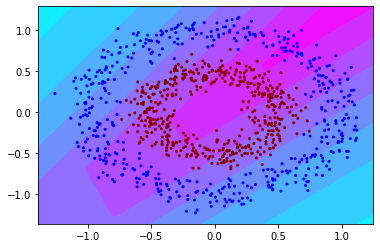

In [79]:
plot_class_model(X_val, y_val, model)

- Tramite le variabili nascoste non lineari, il modello √® riuscito a individuare una suddivisione delle classi composta da pi√π iperpiani

- Possiamo visualizzare i dati nello spazio delle due variabili nascoste
- Dal validation set `X_val` ricaviamo i corrispondenti valori `H_val` delle variabili nascoste
  - usiamo pesi e bias del primo strato del modello per calcolare la combinazione lineare degli input, quindi applichiamo la funzione ReLU

In [80]:
H_val = relu(X_val @ model.coefs_[0] + model.intercepts_[0])

- Visualizziamo quindi un grafico a dispersione su queste due variabili, colorando i dati in base alla classe effettiva

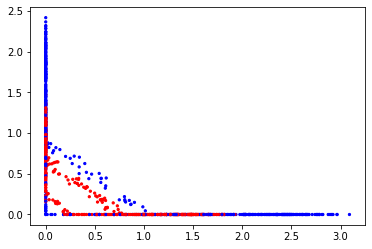

In [81]:
plt.scatter(*H_val.T, s=5, c=np.where(y_val, "red", "blue"));

- Si nota che in questo spazio si pu√≤ ottenere una separazione lineare migliore (anche se non netta) delle due classi
- Possiamo sovrapporre al grafico l'iperpiano individuato dallo strato di output

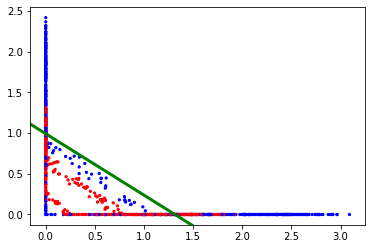

In [82]:
# ricreo lo scatter plot sopra
plt.scatter(*H_val.T, s=5, c=np.where(y_val, "red", "blue"))
xlim, ylim = plt.xlim(), plt.ylim()
# ricavo pesi e bias dell'ultimo strato della rete
w = model.coefs_[1].T[0]
b = model.intercepts_[1]
# estraggo campioni di punti dell'iperpiano e lo disegno
sep_x = np.linspace(*xlim, 2)
sep_y = -w[0]/w[1]*sep_x -b/w[1]
plt.plot(sep_x, sep_y, c="green", lw=3);
plt.xlim(xlim); plt.ylim(ylim);

- Aumentiamo ora il numero di variabili nascoste a 8, per aumentare l'espressivit√† del modello

In [83]:
model = MLPClassifier(hidden_layer_sizes=6, activation="relu", random_state=42)
model.fit(X_train, y_train);

/home/rrobby/.venvs/dia2020/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [84]:
model.score(X_val, y_val)

0.946

- L'accuratezza √® nettamente migliorata

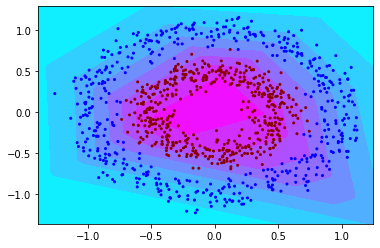

In [85]:
plot_class_model(X_val, y_val, model)

- Dalla combinazione lineare di un numero sufficiente di variabili nascoste, riusciamo ad ottenere un'ottima approssimazione del modello basato su variabili di grado 2 **senza aver definito manualmente alcuna variabile!**

- Il multi-layer perceptron ha molti parametri impostabili oltre a quelli visti
- Tra questi possiamo impostare il numero di _epoche_, ovvero di iterazioni compiute sul training set
  - ad ogni iterazione, la discesa gradiente stocastica processa le osservazioni in gruppi casuali, detti _minibatch_
- Possiamo impostare il numero di epoche col parametro `max_iter`
- Di default √® 200, proviamo qu√¨ ad alzarlo a 1.000 mantenendo le stesse impostazioni di prima

In [86]:
model = MLPClassifier(hidden_layer_sizes=6, max_iter=1000, activation="relu", random_state=42)
model.fit(X_train, y_train);

- Il tempo per addestrare il modello aumenta, ma anche l'accuratezza

In [87]:
model.score(X_val, y_val)

0.989

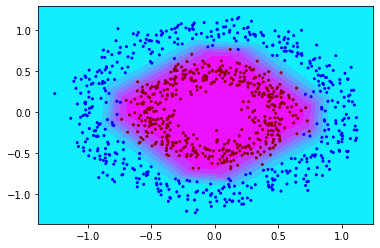

In [88]:
plot_class_model(X_val, y_val, model)

- Aumentando il numero di iterazioni del training set, si pu√≤ notare che il modello √® pi√π preciso e pi√π "sicuro": la distribuzione delle probabilit√† separa pi√π nettamente i due cerchi

- Possiamo anche variare la _batch size_, ovvero il numero di osservazioni in ogni minibatch durante l'addestramento
- Proviamo ad esempio a mantenere le 200 epoche di default, ma a cambiare la batch size da 200 (default) a 50

In [89]:
model = MLPClassifier(hidden_layer_sizes=6, batch_size=50, activation="relu", random_state=42)
model.fit(X_train, y_train);

/home/rrobby/.venvs/dia2020/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


- Anche in questo caso il tempo per l'addestramento √® aumentato rispetto a prima, in quanto ciascuna epoca richiede pi√π passaggi, ma anche in questo modo l'accuratezza √® migliorata

In [90]:
model.score(X_val, y_val)

0.992

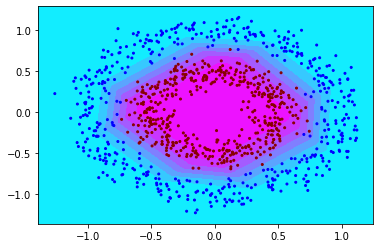

In [91]:
plot_class_model(X_val, y_val, model)

- Nei modelli sopra abbiamo considerato un unico strato di variabili nascoste
- Possiamo per√≤ introdurre un numero arbitrario di questi strati, in modo tale che l'input di ciascuno sia l'output di quello sottostante
- Ciascuno strato pu√≤ avere un numero diverso di variabili nascoste
  - generalmente il numero di variabili si riduce man mano che ci si avvicina all'output finale della rete
  - l'idea √® che le variabili negli **strati superiori** (pi√π vicini all'output della rete) rappresentino **informazioni di pi√π alto livello** rispetto a quelli sottostanti

- Consideriamo ad esempio un modello dove
  - un primo strato di 4 variabili nascoste √® calcolato dalle variabili in input
  - da queste viene calcolato un secondo strato di 2 variabili nascoste
  - da queste viene calcolato l'output finale
- Creiamo un `MLPClassifier` indicando in `hidden_layer_sizes` una tupla con i numeri di variabili in ciascuno strato, in questo caso 4 e 2

In [92]:
model = MLPClassifier(hidden_layer_sizes=(4, 2), activation="relu", random_state=346346)
model.fit(X_train, y_train);

/home/rrobby/.venvs/dia2020/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [93]:
model.score(X_val, y_val)

0.903

- Questa volta abbiamo tre gruppi di pesi e bias: quelli del primo strato nascosto, quelli del secondo e quelli per l'output

In [94]:
model.coefs_

[array([[-0.39325268, -1.97450343,  0.29704215,  1.0615451 ],
        [-1.35165159, -1.10714854, -1.08765132, -1.37464659]]),
 array([[ 0.68017556,  0.30916924],
        [-1.12797845,  0.19131857],
        [ 1.04889929,  0.03509317],
        [-2.09441281,  1.48976843]]),
 array([[ 1.31517725],
        [-0.97719811]])]

In [95]:
model.intercepts_

[array([ 1.2544295 , -0.11637562,  1.11916832, -0.33474098]),
 array([ 0.27230613, -0.42928501]),
 array([-0.96960548])]

- Con l'aggiunta di molteplici strati si possono creare suddivisioni pi√π complesse dello spazio

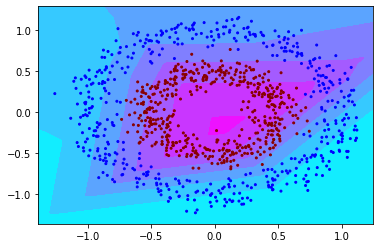

In [96]:
plot_class_model(X_val, y_val, model)

## Esercizio 6: Visualizzazione delle variabili nascoste

- Visualizzare in un grafico a dispersione la distribuzione dei dati del validation set nello spazio individuato dal secondo strato nascosto del modello, sovrapponendo l'iperpiano di separazione individuato dallo strato di output
  - adattare il codice utilizzato sopra per calcolare e visualizzare le variabili nascoste nella rete con un singolo strato nascosto

In [97]:
##solhead:ESERCIZIO 6

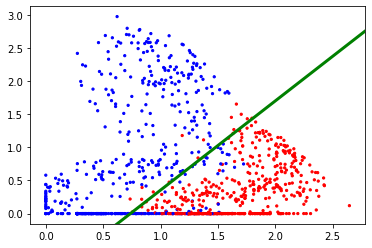

In [98]:
##sol
# dalle variabili di input calcoliamo quelle del primo strato nascosto
H1_val = relu(X_val @ model.coefs_[0] + model.intercepts_[0])

# da queste calcoliamo quelle del secondo strato nascosto
H2_val = relu(H1_val @ model.coefs_[1] + model.intercepts_[1])

# generiamo il grafico, adattando il codice usato sopra
plt.scatter(*H2_val.T, s=5, c=np.where(y_val, "red", "blue"))
xlim, ylim = plt.xlim(), plt.ylim()
w = model.coefs_[2].T[0]
b = model.intercepts_[2]
sep_x = np.linspace(*xlim, 2)
sep_y = -w[0]/w[1]*sep_x -b/w[1]
plt.plot(sep_x, sep_y, c="green", lw=3);
plt.xlim(xlim); plt.ylim(ylim);

- Il _multi-layer perceptron_ visto qu√¨ √® un esempio semplice di _rete neurale_, un modello di apprendimento basato sulla combinazione di molteplici nodi
  - ciascun nodo √® un semplice modello lineare con applicata una _funzione di attivazione_, es. ReLU
- I modelli per le applicazioni reali pi√π complesse possono arrivare ad avere molti strati (es. una decina) con un numero enorme di nodi complessivi (es. milioni)
- Questi modelli sono alla base del _deep learning_, l'apprendimento basato su **molteplici livelli di astrazione** dei dati **appresi automaticamente** dal modello stesso
  - sono modelli particolarmente appropriati per il processamento di dati **non strutturati**, quali immagini e testi, da cui solitamente √® necessario estrarre manualmente molte feature

## Esercizio 7: Modello multi-layer perceptron su caso di studio

- Riprendiamo il dataset del caso di studio sul marketing mirato, suddividendolo in training e test set

In [99]:
X = ctds.drop(columns="target")
y = ctds["target"]
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=1/3, random_state=42)

- **(7a)** Effettuare una grid search con cross validation a 3 fold stratificati sul training set per individuare i parametri migliori di un classificatore multi-layer perceptron con
  - standardizzazione dei dati in ingresso
  - 3 possibili configurazione degli strati nascosti
    - uno strato di 16 variabili
    - uno strato di 32 variabili
    - due strati di 16 e 8 variabili rispettivamente
  - batch size di 100 oppure 200
- **(7b)** Ottenere la configurazione risultata migliore
- **(7c)** Verificare sul test set l'accuratezza del modello con tale configurazione
- **(7d)** Stampare l'intervallo di confidenza di tale accuratezza

In [ ]:
##solhead:ESERCIZIO 7

In [100]:
##sol:7a
model = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(activation="relu"))
])
grid = {
    "mlp__hidden_layer_sizes": [16, 32, (16, 8)],
    "mlp__batch_size": [100, 200]
}
skf = StratifiedKFold(3, shuffle=True)
gs = GridSearchCV(model, grid, cv=skf)
gs.fit(X_train, y_train);

/home/rrobby/.venvs/dia2020/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/rrobby/.venvs/dia2020/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/rrobby/.venvs/dia2020/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/rrobby/.venvs/dia2020/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimizati

In [102]:
##sol:7b
gs.best_params_

{'mlp__batch_size': 200, 'mlp__hidden_layer_sizes': 16}

In [103]:
##sol:7c
gs.score(X_test, y_test)

0.5704576347983689

In [104]:
##sol:7d
model_conf_interval(gs, X_test, y_test)

(0.5497008207424854, 0.5909696008108962)